# Pengaruh Kuat Interaksi $\lambda$

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from jc_model import *
%matplotlib inline

In [2]:
wa = 2*np.pi                        #frekuensi qutip
wc_list = [0.1*wa, 0.5*wa, 1.0*wa] #frekuensi medan
N = 15
use_rwa = False
g_list = np.linspace(0, 2, 50)*wa   # Kuat interaksi
tlist = np.linspace(0,100,301)


#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Inisiasi list E
E_list = np.zeros([len(wc_list), len(g_list)])

In [3]:
for i, wc in enumerate(wc_list):
    for j, g in enumerate(g_list):
        # Hitung Hamiltonian
        H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
        
        # menghitung ground state & energinya
        gnd_energy, gnd_state = H.groundstate()
        
        E_list[i,j] = gnd_energy/(wa)

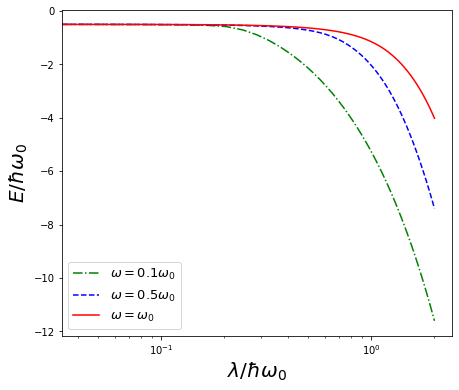

In [4]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
axes.semilogx(g_list/wa, E_list[0], 'g-.', label=r"$\omega=0.1\omega_0$")
axes.semilogx(g_list/wa, E_list[1], 'b--', label=r"$\omega=0.5\omega_0$")
axes.semilogx(g_list/wa, E_list[2], 'r-', label=r"$\omega=\omega_0$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$E/\hbar\omega_{0}$', fontsize=20)
plt.savefig('Plot_Energi_kuat_interaksi.pdf')  